<a href="https://colab.research.google.com/github/brayanb1701/Fisica3_Lab2/blob/main/Lab_2_Lab_Fisica_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit,fsolve
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data = pd.read_excel("Datos.xlsx", 'Tabla1')
g_theory = 9.82
data

,X2,t1,T1,T1_2,t2,T2,T2_2
0,20,105.59,2.1118,4.459699,101.31,2.0262,4.105486
1,25,102.34,2.0468,4.189390,100.67,2.0134,4.053780
2,30,100.22,2.0044,4.017619,100.17,2.0034,4.013612
3,35,99.37,1.9874,3.949759,99.59,1.9918,3.967267
4,40,98.64,1.9728,3.891940,99.43,1.9886,3.954530
5,45,97.78,1.9556,3.824371,99.18,1.9836,3.934669
6,50,97.91,1.9582,3.834547,99.25,1.9850,3.940225
7,55,97.97,1.9594,3.839248,99.33,1.9866,3.946580
8,60,98.60,1.9720,3.888784,99.33,1.9866,3.946580
9,65,99.29,1.9858,3.943402,99.88,1.9976,3.990406


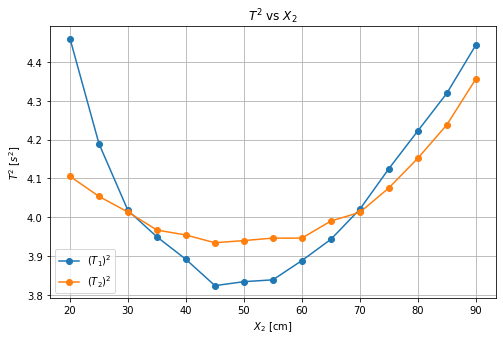

In [ ]:
plt.figure(figsize=(8,5))
#plt.scatter(data['Frecuencia'],data['Amp_Salida'])
plt.plot(data['X2'],data['T1_2'],'o-', label='$(T_1)^2$')
plt.plot(data['X2'],data['T2_2'],'o-', label='$(T_2)^2$')
plt.legend()
plt.title('$T^2$ vs $X_2$')
plt.xlabel("$X_2$ [cm]")
plt.ylabel("$T^2$ $[s^2]$")
plt.grid()
plt.show()

In [ ]:
def cubic(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d
def linear(x, m, b):
    return m*x+b

In [ ]:
popt1, pcov1 = curve_fit(cubic, data['X2'], data['T1_2'])
print(popt1)
R_S1 = r2_score(data['T1_2'],cubic(data['X2'], *popt1))
RMSE1 = mean_squared_error(data['T1_2'],cubic(data['X2'], *popt1), squared=False)
print(R_S1)
print(RMSE1)

[-5.41868020e-06  1.37544411e-03 -9.54128116e-02  5.82844940e+00]
0.9926832458162655
0.017970132187891376


In [ ]:
popt2, pcov2 = curve_fit(cubic, data['X2'], data['T2_2'])
print(popt2)
R_S2 = r2_score(data['T2_2'],cubic(data['X2'], *popt2))
RMSE2 = mean_squared_error(data['T2_2'],cubic(data['X2'], *popt2), squared=False)
print(R_S2)
print(RMSE2)

[ 1.26944491e-06  2.69837758e-05 -1.24971793e-02  4.32995629e+00]
0.9966601993709331
0.006861658499155214


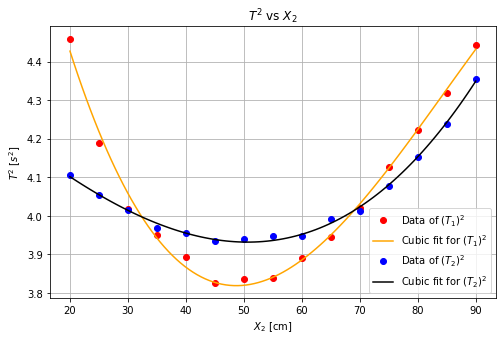

In [ ]:
x_new = np.linspace(20,90,100)
plt.figure(figsize=(8,5))
plt.plot(data['X2'],data['T1_2'],'o', c='red', label='Data of $(T_1)^2$')
plt.plot(x_new, cubic(x_new, *popt1), 'r-', c='orange',
         label='Cubic fit for $(T_1)^2$')
plt.plot(data['X2'],data['T2_2'],'o', c='blue', label='Data of $(T_2)^2$')
plt.plot(x_new, cubic(x_new, *popt2), 'r-', c='black',
         label='Cubic fit for $(T_2)^2$')
plt.legend()
plt.title('$T^2$ vs $X_2$')
plt.xlabel("$X_2$ [cm]")
plt.ylabel("$T^2$ $[s^2]$")
plt.grid()
plt.show()

In [ ]:
root_coef = popt1-popt2
print(root_coef)
def root_cubic(x, root_coef=root_coef):
    return cubic(x, *root_coef)
roots = fsolve(root_cubic,[30,80])
roots

[-6.68812511e-06  1.34846033e-03 -8.29156323e-02  1.49849311e+00]


array([32.40652848, 68.97059622])

In [ ]:
cubic(roots, *popt2)

array([3.99650675, 4.01286984])

In [ ]:
sum(cubic(roots, *popt2))/2

4.004688293685515

In [ ]:
T2_prom = sum(cubic(roots, *popt2))/2
print(T2_prom)
g_cubic = 4*np.pi**2*0.994/T2_prom
print(g_cubic)
error = (g_theory-g_cubic)/g_theory*100
print(error)

4.004688293685515
9.798901742391863
0.21484987380995693


In [ ]:
linl1, _ = curve_fit(linear, data['X2'][[2,3]], data['T1_2'][[2,3]])
print(linl1)
linl2, _ = curve_fit(linear, data['X2'][[2,3]], data['T2_2'][[2,3]])
print(linl2)
linr1, _ = curve_fit(linear, data['X2'][[9,10]], data['T1_2'][[9,10]])
print(linr1)
linr2, _ = curve_fit(linear, data['X2'][[9,10]], data['T2_2'][[9,10]])
print(linr2)
inter_coef_l = linl1-linl2
inter_coef_r = linr1-linr2
root1 = -inter_coef_l[1]/inter_coef_l[0]
root2 = -inter_coef_r[1]/inter_coef_r[0]
print([root1,root2])

[-0.01357212  4.42478296]
[-0.00926886  4.29167748]
[0.01548508 2.93687144]
[0.0044809  3.69914752]
[30.931341291338253, 69.27147710361793]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
print(linear(root1, *linl1))
print(linear(root2, *linr1))

4.0049790842330015
4.0095458046676935


In [ ]:
T2_prom = (linear(root1, *linl1)+linear(root2, *linr1))/2
print(T2_prom)
g_linear = 4*np.pi**2*0.994/T2_prom
print(g_linear)
error = (g_theory-g_linear)/g_theory*100
print(error)

4.0072624444503475
9.79260720821439
0.2789489998534651


In [ ]:
data2 = pd.read_excel("Datos.xlsx", 'Tabla2')
data2

,L,t1,t2,t3,t,desv_t,T,T_2,desv_T_2
0,24.0,19.20,19.31,19.18,19.230000,0.057155,0.961500,0.924482,0.005495
1,24.5,19.43,19.77,19.64,19.613333,0.140079,0.980667,0.961707,0.013737
2,50.5,28.24,28.22,28.32,28.260000,0.043205,1.413000,1.996569,0.006105
3,75.3,34.38,34.49,34.50,34.456667,0.054365,1.722833,2.968155,0.009366
4,101.0,40.23,40.20,40.15,40.193333,0.032998,2.009667,4.038760,0.006632
5,124.5,44.50,44.42,44.47,44.463333,0.032998,2.223167,4.942470,0.007336
6,147.5,48.76,48.64,48.71,48.703333,0.049216,2.435167,5.930037,0.011985


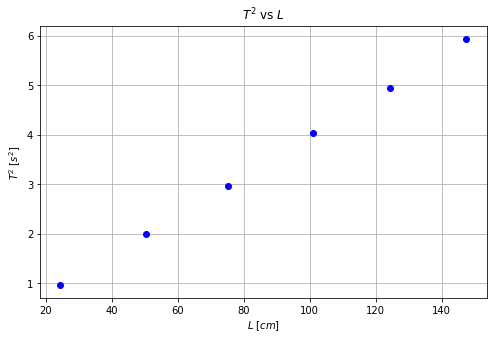

In [ ]:
plt.figure(figsize=(8,5))
#plt.scatter(data['Frecuencia'],data['Amp_Salida'])
#plt.plot(data2['L'][1:],data2['T_2'][1:],'o-')
plt.errorbar(data2['L'][1:],data2['T_2'][1:], yerr = data2['desv_T_2'][1:],fmt='o',ecolor = 'red',color='blue')
plt.title('$T^2$ vs $L$')
plt.xlabel("$L$ $[cm]$")
plt.ylabel("$T^2$ $[s^2]$")
plt.grid()
plt.show()

In [ ]:
coef_lin, _ = curve_fit(linear, data2['L'][1:], data2['T_2'][1:])
print(coef_lin)

[ 0.04027492 -0.0396943 ]


In [ ]:
R_S2 = r2_score(data2['T_2'],linear(data2['L'], *coef_lin))
RMSE2 = mean_squared_error(data2['T_2'],linear(data2['L'], *coef_lin), squared=False)
print(R_S2)
print(RMSE2)

0.9998756597103844
0.020135335683492496


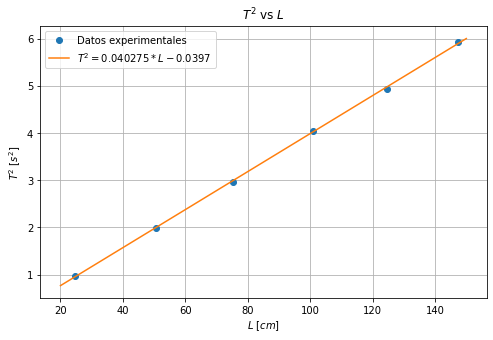

In [ ]:
x_new = np.linspace(20, 150, 100)
plt.figure(figsize=(8,5))
#plt.scatter(data['Frecuencia'],data['Amp_Salida'])
plt.plot(data2['L'][1:],data2['T_2'][1:],'o', label='Datos experimentales')
plt.plot(x_new,linear(x_new,*coef_lin),label='$T^2=0.040275*L-0.0397$')
plt.legend()
plt.title('$T^2$ vs $L$')
plt.xlabel("$L$ $[cm]$")
plt.ylabel("$T^2$ $[s^2]$")
plt.grid()
plt.show()

In [ ]:
g_simple = 4*np.pi**2/coef_lin[0]*1e-2
print(g_simple)
error = (g_theory-g_simple)/g_theory*100
print(error)

9.80223467058197
0.18090966820804025


In [ ]:
coef_lin[0]

0.04027491580347316